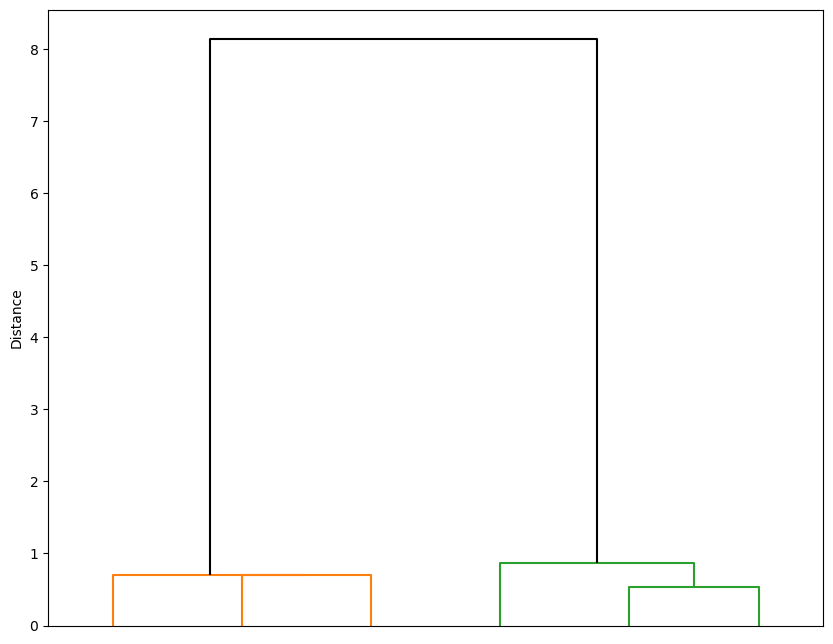

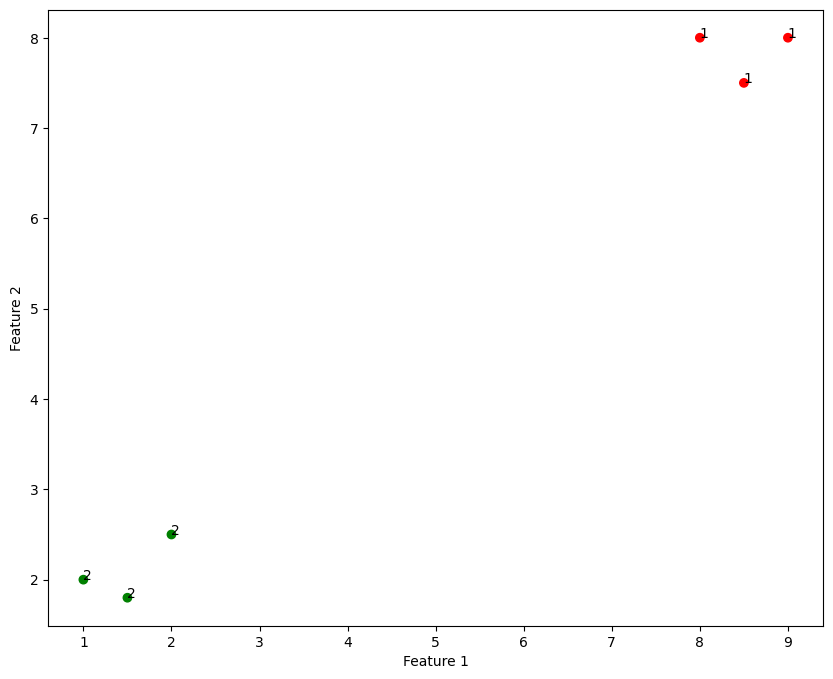

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Define the data points
X = np.array([[1, 2], [1.5, 1.8], [2, 2.5], [8, 8], [8.5, 7.5], [9, 8]])
labels = ['A', 'B', 'C', 'D', 'E', 'F']

# Perform hierarchical clustering 
Z = linkage(X, method='single')
max_d = 2.5
labels = fcluster(Z, max_d, criterion='distance')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 8))
dn = dendrogram(Z, labels=labels, above_threshold_color='black')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Distance')


colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']
cluster_colors = [colors[label-1] for label in labels]

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_colors)

for i, txt in enumerate(labels):
    ax.annotate(txt, (X[i,0], X[i,1]))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


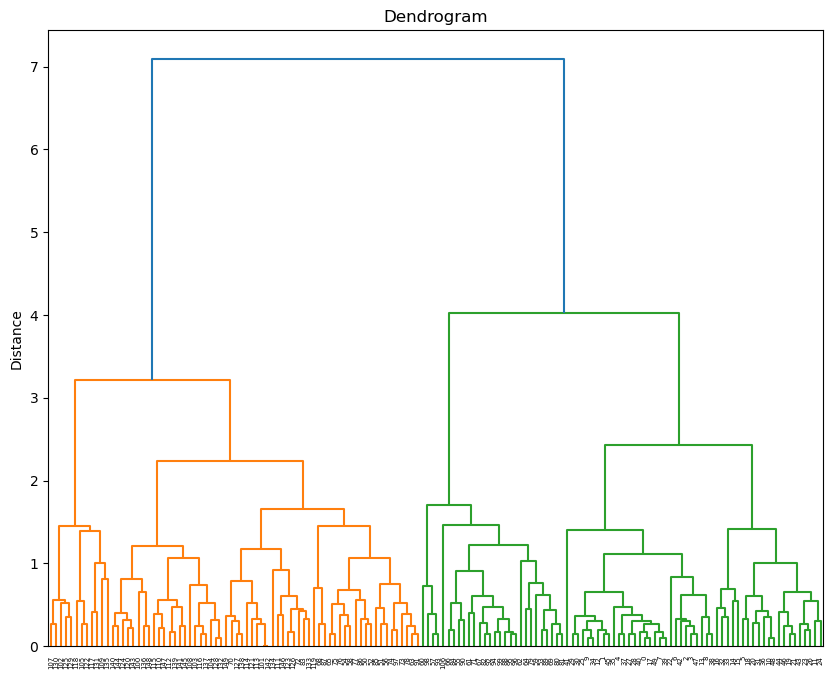

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 2 2 1 2 2 1 3 1 2 1 2
 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Calculate the linkage matrix 
Z = linkage(X, method='complete')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 8))
dn = dendrogram(Z)
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Obtain cluster labels based on a threshold distance of 3
max_dist = 2.5
labels = fcluster(Z, t=max_dist, criterion='distance')

# Print the cluster labels 
print(labels)



In [20]:
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index (ARI): {ari_score}")

Adjusted Rand Index (ARI): 0.5894567364350092


/Users/wwami/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


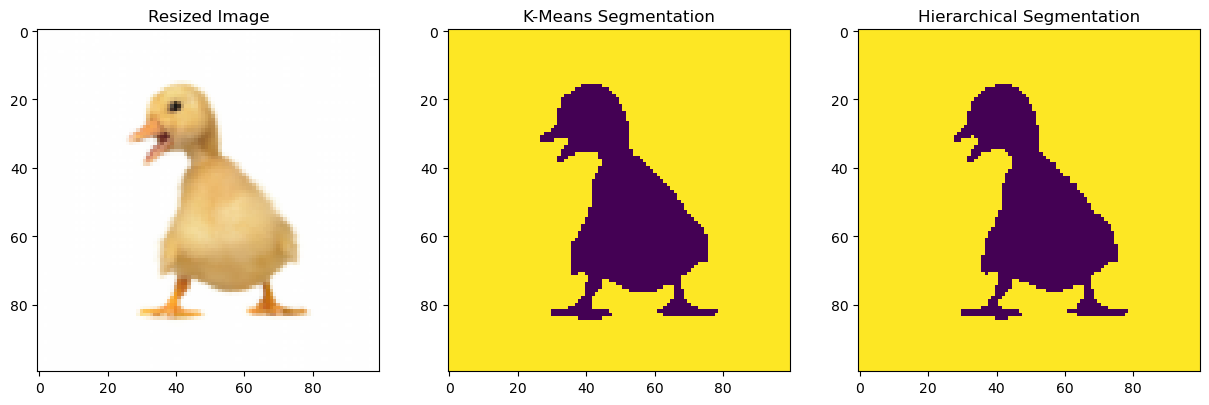

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, rgb2lab
from skimage.transform import resize
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Load the image
image = imread('image.jpeg')


image_resized = resize(image, (100, 100), anti_aliasing=True)
image_gray = rgb2gray(image_resized)
image_lab = rgb2lab(image_resized)
w, h, d = tuple(image_lab.shape)
image_array = np.reshape(image_lab, (w*h, d))

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_array)
kmeans_labels = kmeans.predict(image_array)
kmeans_centers = kmeans.cluster_centers_
kmeans_image = np.reshape(kmeans_labels, (w, h))

# Apply hierarchical clustering
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
model.fit(image_array)
hierarchical_labels = model.labels_
hierarchical_image = np.reshape(hierarchical_labels, (w, h))

# Visualize the original image, k-means segmentation, and hierarchical segmentation
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_resized)
axs[0].set_title('Resized Image')
axs[1].imshow(kmeans_image)
axs[1].set_title('K-Means Segmentation')
axs[2].imshow(hierarchical_image)
axs[2].set_title('Hierarchical Segmentation')


plt.show()
